#### <font color="#03997A"> Diplomado en Ciencia de datos UNAM </font>

##### <font color="#03997A"> Dr: Alejandro Pimentel  </font>

##### <font color="#03997A"> Modulo 8 Introducción al Deep Learning </font>

##### <font color="#03997A"> Tema 3 Representación de operaciones matriciales en lenguaje tensorial (apliado a clasicación de imagenes)    Alumno: Ibarra Ramírez Sergio </font>

La data será tomada de: MNIST handwritten digit database, Yann LeCun, Corinna Cortes and Chris Burges

Se descargará la data de los digitos escritos a mano

In [1]:
import requests

urls = [
    "http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz",
    "http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz",
    "http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz",
    "http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz"
]

for url in urls:
    filename = url.split("/")[-1]  # Extract the filename from the URL
    response = requests.get(url)
    with open(filename, "wb") as f:
        f.write(response.content)
    print(f"Downloaded {filename}")


Downloaded train-images-idx3-ubyte.gz
Downloaded train-labels-idx1-ubyte.gz
Downloaded t10k-images-idx3-ubyte.gz
Downloaded t10k-labels-idx1-ubyte.gz


Se deben descomprimir los datos pues están en modo .gz

In [2]:
import idx2numpy

ruta_train_images = 'train-images-idx3-ubyte'
ruta_train_labels = 'train-labels-idx1-ubyte'
ruta_test_images = 't10k-images-idx3-ubyte'
ruta_test_labels = 't10k-labels-idx1-ubyte'

train_images = idx2numpy.convert_from_file(ruta_train_images)
train_labels = idx2numpy.convert_from_file(ruta_train_labels)
test_images = idx2numpy.convert_from_file(ruta_test_images)
test_labels = idx2numpy.convert_from_file(ruta_test_labels)

In [3]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [4]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Para intentar visualizar los datos 

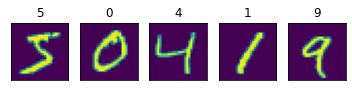

In [5]:
import matplotlib.pyplot as plt

imagenes_mostrar = train_images[:5] # unas 5
labels_mostrar = train_labels[:5]
for i, (img,label) in enumerate(zip(imagenes_mostrar,labels_mostrar)):
    plt.subplot(151 + i) #esto es para que las ponga lado a lado, se interpreta cada dígito (1: renglon, 5:columnas, x: el indice en el que se va poniendo)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.title(label)

In [6]:
train_images.reshape([-1,784]).shape

(60000, 784)

Volvemos a importar los datos y normalizarlos 

In [7]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import normalize

X,y = fetch_openml('mnist_784', as_frame=False, return_X_y=True)

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [8]:
X = normalize(X)

In [9]:
X_train = X[:60000]
X_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]

In [10]:
X_train.shape

(60000, 784)

In [11]:
y_train.shape

(60000,)

##### Vamos a hacer Encoding de nuestros datos de entrnamiento 

In [12]:
from sklearn.preprocessing import OneHotEncoder

codificador = OneHotEncoder(handle_unknown='ignore',sparse=False)
y_train = codificador.fit_transform(y_train.reshape(-1,1))
y_test = codificador.transform(y_test.reshape(-1,1))

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#### Uso de Tensorflow para operaciones matriciales en redes neuronales 

In [13]:
import tensorflow as tf

##### Preparación del dataset

In [14]:
X_train = tf.constant(X_train, dtype=tf.float32)
X_test = tf.constant(X_test, dtype=tf.float32)
y_train = tf.constant(y_train, dtype=tf.float32)
y_test = tf.constant(y_test, dtype=tf.float32)

In [15]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(784,), dtype=tf.float32, name=None), TensorSpec(shape=(10,), dtype=tf.float32, name=None))>

In [16]:
batch_size = 100 # Hiperparámetro
train_dataset = train_dataset.shuffle(batch_size).batch(batch_size)

### Si no se normaliza la entrada el calculo del gradiente, es decir, de la pendiente puede dar pasos muy grandes y pasos muy chicos que probocan que la ted no converga  

Otra cosa que se debe verificar es el learning rate 

## Red multicapa  

Se va requerir un juego de pesos por cada capa que se agrega

In [25]:
b1 = tf.Variable(tf.random.normal([100]))
W1 = tf.Variable(tf.random.normal([784,100]))
W1

<tf.Variable 'Variable:0' shape=(784, 100) dtype=float32, numpy=
array([[-0.5869398 ,  0.7050576 , -0.35582685, ..., -1.1209118 ,
        -1.1095564 , -1.203286  ],
       [ 0.9300066 ,  0.5270253 , -0.62044954, ..., -0.15377265,
         0.65100896, -2.9515123 ],
       [-1.3420908 , -2.1561484 ,  0.5046944 , ...,  0.53189   ,
         0.85732305, -1.5788636 ],
       ...,
       [ 1.6549932 , -0.29119   ,  0.30019945, ..., -0.62216073,
        -1.5143024 , -0.2395874 ],
       [ 1.2634319 ,  3.3268197 ,  0.5217027 , ...,  1.3708354 ,
         0.94002986, -0.7263301 ],
       [ 2.9727304 ,  0.9074828 ,  0.3695789 , ...,  1.6051044 ,
         0.09117821,  0.9603046 ]], dtype=float32)>

Por lo tanto se agregam los de la capa 2
El numero de neuronas en un parametro libre a a justar.
Pero la salida de una capa l son las mimsmas que la entrada de una capa l+1 
Por ejemplo

In [26]:
b2 = tf.Variable(tf.random.normal([10]))
W2 = tf.Variable(tf.random.normal([100,10]))
W2

<tf.Variable 'Variable:0' shape=(100, 10) dtype=float32, numpy=
array([[ 4.21367764e-01, -1.65581703e+00,  2.05151573e-01,
        -5.16583383e-01, -2.06110859e+00,  9.87200558e-01,
        -5.53487659e-01,  1.11810124e+00,  8.64786446e-01,
        -2.62024522e-01],
       [ 1.11708760e+00,  7.61228148e-05, -3.72769654e-01,
         4.25275564e-01, -1.14438124e-01, -7.73250878e-01,
         3.57533127e-01, -9.88471210e-01,  7.30752528e-01,
         1.09424090e+00],
       [ 4.62678783e-02, -1.98370799e-01, -1.55637056e-01,
         1.03255630e+00, -4.47560787e-01,  6.81961715e-01,
         2.01975441e+00, -2.00690937e+00, -5.78869760e-01,
         1.35221839e+00],
       [ 1.60979915e+00, -1.53859798e-02, -3.89440730e-02,
        -9.09681559e-01, -1.20768875e-01,  5.38890004e-01,
         1.38422239e+00,  9.62033749e-01, -1.24821424e+00,
        -2.34933734e+00],
       [-3.85080904e-01,  6.23557866e-01, -4.15118754e-01,
        -1.47132826e+00,  2.41801524e+00,  8.64456519e-02,
      

Recordar que es necesario tener entre capa y capa una función de activación no lineal 

In [27]:
optimizador = tf.keras.optimizers.experimental.SGD(learning_rate=0.1)


In [20]:
epochs = 10
for _ in range(epochs):
  loss_epoch = 0
  for x,y in train_dataset: # Es un batch
    with tf.GradientTape() as gt:
      # Forward
      operacion_matricial = tf.matmul(x,W1)+b1 # Primera capa
      capa1 = tf.nn.relu(operacion_matricial)

      capa2 = tf.matmul(capa1,W2)+b2

      probs = tf.nn.softmax(capa2)

        # Loss
      prob_as = probs*y # Probabilidades de las clases correctas (a)
      vec_probs = tf.reduce_sum(prob_as,axis=1)
      x_ent = -tf.math.log(vec_probs)
      loss = tf.reduce_mean(x_ent)

      # Backward
      optimizador.minimize(loss,[W1,b1,W2,b2],gt) # No olvidar cuáles son los parámetros a ajustar

    loss_epoch += loss/len(train_dataset)
  print(loss_epoch)

tf.Tensor(1.6361781, shape=(), dtype=float32)
tf.Tensor(0.6673584, shape=(), dtype=float32)
tf.Tensor(0.5395781, shape=(), dtype=float32)
tf.Tensor(0.47548464, shape=(), dtype=float32)
tf.Tensor(0.43467414, shape=(), dtype=float32)
tf.Tensor(0.40595, shape=(), dtype=float32)
tf.Tensor(0.3839376, shape=(), dtype=float32)
tf.Tensor(0.36651787, shape=(), dtype=float32)
tf.Tensor(0.35213965, shape=(), dtype=float32)
tf.Tensor(0.3398551, shape=(), dtype=float32)


In [21]:
# Salida
operacion_matricial = tf.matmul(X_test,W1)+b1
capa1 = tf.nn.relu(operacion_matricial)

capa2 = tf.matmul(capa1,W2)+b2

probs = tf.nn.softmax(capa2)

# Comparación
max_preds = tf.argmax(probs,1)
max_trues = tf.argmax(y_test,1)

numCorrectos = tf.equal(max_preds,max_trues)
acc = tf.reduce_mean(tf.cast(numCorrectos,tf.float32))
print(acc)

tf.Tensor(0.9008, shape=(), dtype=float32)


 # Agregando función de activación a la segunda capa 

In [28]:
epochs = 10
for _ in range(epochs):
  loss_epoch = 0
  for x,y in train_dataset: # Es un batch
    with tf.GradientTape() as gt:
      # Forward
      operacion_matricial = tf.matmul(x,W1)+b1 # Primera capa
      capa1 = tf.nn.relu(operacion_matricial)

      operacion_matricial2 = tf.matmul(capa1,W2)+b2 # Primera capa
      capa2 = tf.nn.relu(operacion_matricial2)

      probs = tf.nn.softmax(capa2)

        # Loss
      prob_as = probs*y # Probabilidades de las clases correctas (a)
      vec_probs = tf.reduce_sum(prob_as,axis=1)
      x_ent = -tf.math.log(vec_probs)
      loss = tf.reduce_mean(x_ent)

      # Backward
      optimizador.minimize(loss,[W1,b1,W2,b2],gt) # No olvidar cuáles son los parámetros a ajustar

    loss_epoch += loss/len(train_dataset)
  print(loss_epoch)

tf.Tensor(2.010554, shape=(), dtype=float32)
tf.Tensor(1.6242188, shape=(), dtype=float32)
tf.Tensor(1.4916096, shape=(), dtype=float32)
tf.Tensor(1.4310433, shape=(), dtype=float32)
tf.Tensor(1.3865687, shape=(), dtype=float32)
tf.Tensor(1.3044662, shape=(), dtype=float32)
tf.Tensor(1.231862, shape=(), dtype=float32)
tf.Tensor(1.199813, shape=(), dtype=float32)
tf.Tensor(1.1814293, shape=(), dtype=float32)
tf.Tensor(1.1684906, shape=(), dtype=float32)


In [29]:
# Salida
operacion_matricial = tf.matmul(X_test,W1)+b1
capa1 = tf.nn.relu(operacion_matricial)

capa1 = tf.nn.relu(operacion_matricial)

operacion_matricial2 = tf.matmul(capa1,W2)+b2 # Primera capa
capa2 = tf.nn.relu(operacion_matricial2)


probs = tf.nn.softmax(capa2)

# Comparación
max_preds = tf.argmax(probs,1)
max_trues = tf.argmax(y_test,1)

numCorrectos = tf.equal(max_preds,max_trues)
acc = tf.reduce_mean(tf.cast(numCorrectos,tf.float32))
print(acc)

tf.Tensor(0.5595, shape=(), dtype=float32)


En este caso agregar una función RELU a la segunda capa no mejoró la accuracy de la clasificación de números y en este caso el SOFTMAX está recibiendo la salida de la capa2 y si ya tiene valores muy pequeños y afecta al calculo de la probabilidad 